# Predicting Heart Disease using Machine Learning RandomForestClassifier

**Features: **
- age
- sex
- cp (chest pain type):
   - Value 1: typical angina
   - Value 2: atypical angina
   - Value 3: non-anginal pain
   - Value 4: asymptomatic
- trestbps (resting blood pressure)
- chol (serum cholestoral in mg/dl)
- restecg (fasting blood sugar > 120 mg/dl)
- thalach (maximum heart rate achieved)
- exang (exercise induced angina)
- oldpeak (ST depression induced by exercise relative to rest)
- slope (the slope of the peak exercise ST segment):
   - Value 1: upsloping
   - Value 2: flat
   - Value 3: downslopingthe slope of the peak exercise ST segment
- ca (number of major vessels (0-3) colored by flourosopy)
- thal:
   - Value 3: normal
   - Value 6: fixed defect 
   - Value 7: reversable defect


In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score,\
                                    RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, precision_score,\
                            recall_score, f1_score, plot_roc_curve
plt.style.use("seaborn-whitegrid")

## 1. Load data and get an overview about it content

In [2]:
# Load data into a dataFrame
data = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Check missing values 
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
# Get the information about features type
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
# get info about target samples, to see the proportion between people with and without hear diseas
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
# get info about sex samples
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

## 2. Exploratory data analysis

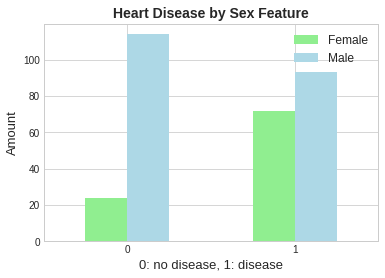

In [7]:
# Visualize proporsion between sex and heart disease results
pd.crosstab(data.target, data.sex).plot(kind="bar", 
                                        color=["lightgreen", "lightblue"],
                                        title="Heart Disease by Sex Feature",
                                        rot=0)

plt.title("Heart Disease by Sex Feature", fontweight="bold", fontsize=14)
plt.legend(["Female", "Male"], fontsize=12)
plt.xlabel("0: no disease, 1: disease", fontsize=13)
plt.ylabel("Amount", fontsize=13);

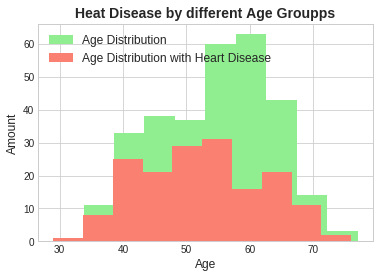

In [8]:
# Visualize proporsion between sex and heart disease results
# Age groups 
data.age.plot(kind="hist", 
              color="lightgreen")
# Age groups with heart disease
data.age[data.target == 1].plot(kind="hist", 
              color="salmon")

plt.title("Heat Disease by different Age Groupps", fontweight="bold", fontsize=14)
plt.legend(["Age Distribution", "Age Distribution with Heart Disease"], loc = 'upper left', fontsize=12)
plt.xlabel("Age", fontsize=12);
plt.ylabel("Amount", fontsize=12);

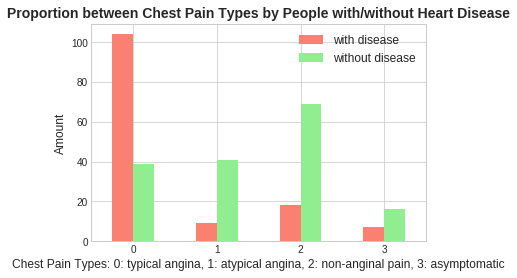

In [9]:
# Visualize proportion between chest pain types
pd.crosstab(data.cp, data.target).plot(kind="bar",
                                       color=["salmon", "lightgreen"],
                                       rot=0)

plt.legend(["with disease", "without disease"], prop={'size': 12})
plt.title("Proportion between Chest Pain Types by People with/without Heart Disease", fontweight="bold", fontsize=14)
plt.xlabel("Chest Pain Types: 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic",
          fontsize=12)
plt.ylabel("Amount", fontsize=12);

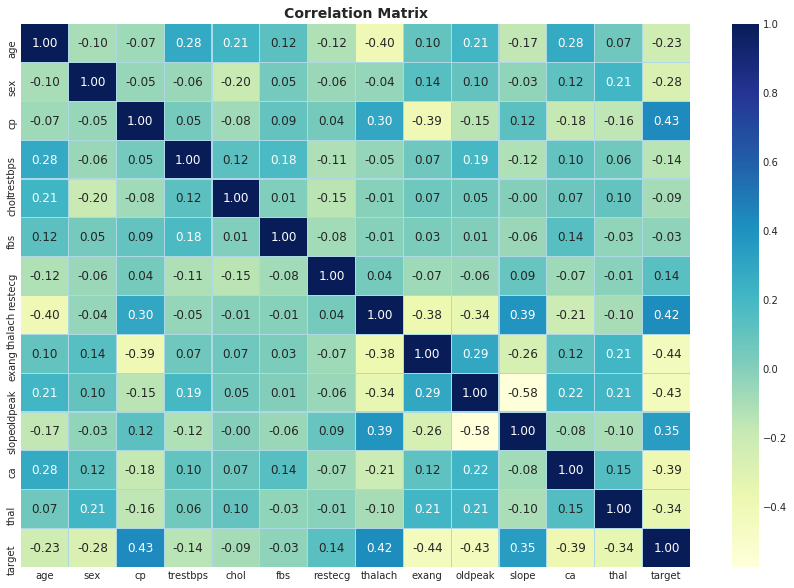

In [10]:
# Visualize a features correlation
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),
                 annot=True,
                 annot_kws={"size": 12},
                 linewidths=0.2,
                 linecolor="lightblue",
                 fmt=".2f",
                 cmap="YlGnBu")
sns.set(font_scale=1.2)
plt.title("Correlation Matrix", fontsize=14, fontweight="bold");

In [11]:
pd.crosstab(data.exang, data.target)

target,0,1
exang,,
0,62,142
1,76,23


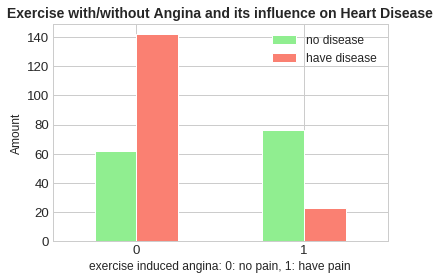

In [12]:
# Visualize proportion between chest pain types
plt.style.use("seaborn-whitegrid")
pd.crosstab(data.exang, data.target).plot(kind="bar",
                                          color=["lightgreen", "salmon"],
                                          rot=0)

plt.legend(["no disease", "have disease"], prop={'size': 12})
plt.title("Exercise with/without Angina and its influence on Heart Disease", fontweight="bold", fontsize=14)
plt.xlabel("exercise induced angina: 0: no pain, 1: have pain",
          fontsize=12)
plt.ylabel("Amount", fontsize=12);

## 3. Modelling

In [13]:
np.random.seed(22)
# Split data into features X and result y 
X = data.drop("target", axis=1)
y = data.target

# Split data into training and testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# choose RandomForestClassifier for that data set 
model = RandomForestClassifier()

# fit the model 
model.fit(X_train, y_train) 

# get first score results 
model.score(X_test, y_test)

0.7868852459016393

### Tuning the model 

In [14]:
np.random.seed(32)
# Create a hyperparameter grid for RandomizedSearchCV
rf_rgrid = {"n_estimators":[100, 120, 300, 500, 800, 1200],
          "max_depth":[None, 5, 8, 15, 25, 30],
          "min_samples_split":[2,5,10,15,100],
          "min_samples_leaf": [2,5,10],
          "max_features": ['auto', 'sqrt','log2', None]}

rf_rscv = RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions=rf_rgrid,
                             n_iter=20,
                             cv=5,
                             verbose=True)

rf_rscv.fit(X_train, y_train) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [15]:
rf_rscv.score(X_test, y_test)

0.8032786885245902

In [16]:
rf_rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 15,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 25}

In [17]:
# optimise the model with GriedSearchCV
rf_ggried = {"n_estimators":[100,150,200],
             "max_depth":[7,15,25],
             "max_features": ['auto', 'sqrt'],
             "min_samples_split":[2, 15], 
             "min_samples_leaf": [6, 5]}

rf_gscv = GridSearchCV(RandomForestClassifier(),
                       param_grid=rf_ggried,
                       cv=7,
                       verbose=True)


model = rf_gscv.fit(X_train, y_train)

Fitting 7 folds for each of 72 candidates, totalling 504 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 504 out of 504 | elapsed:  3.0min finished


In [18]:
model.score(X_test, y_test)

0.8032786885245902

In [19]:
model.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 150}

## 4. Evaluation 

In [20]:
# save predictions 
y_preds = rf_gscv.predict(X_test)

In [21]:
# create funktion for all necessary evaluation methods  
def evaluations(y_test, y_preds):
    print(f"Accuracy:{accuracy_score(y_test, y_preds)*100:.2f}%")
    print(f"Precision:{precision_score(y_test, y_preds)*100:.2f}%")
    print(f"Recall:{recall_score(y_test, y_preds)*100:.2f}%")
    print(f"F1:{f1_score(y_test, y_preds)*100:.2f}%")

In [22]:
evaluations(y_test, y_preds)

Accuracy:80.33%
Precision:80.56%
Recall:85.29%
F1:82.86%


In [23]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        27
           1       0.81      0.85      0.83        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



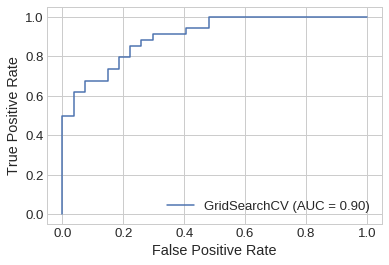

In [24]:
# Plot ROC curve and get AUC metric
plot_roc_curve(rf_gscv, X_test, y_test);

Text(16.5, 0.5, 'Predicted label')

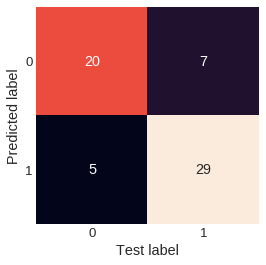

In [25]:
# create a confusion_matrix
plt.subplots(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, y_preds),
            annot=True,
            cbar=False)
plt.yticks(rotation=0);
plt.xlabel("Test label")
plt.ylabel("Predicted label")

## Save Model 

In [26]:
pickle.dump(model, open("rfc_model.sav", 'wb'))